## Machine learning models with variable importance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [2]:
# Plotting macros
colors = ['#255f85', '#c5283d', '#e9724c', '#ffc857', '#481d24']

In [3]:
# Read in data
covid_df = pd.read_csv('../data/cleaned_05-29-2020.csv', index_col=0)

In [4]:
# Only consider counties with >= 10 confirmed cases
covid_df = covid_df.loc[covid_df['Confirmed'] >= 10]

In [5]:
# Split into predictors and response
not_x = ['q_popdensity', 'fips', 'Deaths', 'Confirmed']
x_cols = [col for col in covid_df.columns if col not in not_x]
X = covid_df[x_cols]
y = covid_df['Deaths']/covid_df['Confirmed']

### Create AdaBoost model and quantify variable importance

In [6]:
# Repeat for death rate
# Instantiate, fit, report score
ab_regr_death_rate = AdaBoostRegressor(n_estimators=600)
ab_regr_death_rate.fit(X, y)
ab_regr_death_rate.score(X, y)

-0.0964119401271788

In [7]:
# Determine variable importance
feature_impts = pd.DataFrame()
feature_impts['feature'] = X.columns 
feature_impts['ab_death_rate'] = ab_regr_death_rate.feature_importances_

In [8]:
feature_impts

,feature,ab_death_rate
0,mean_pm25,0.019087
1,popdensity,0.017006
2,older_percent,0.082139
3,poverty,0.037635
4,medhouseholdincome,0.056642
5,pct_blk,0.032708
6,hispanic,0.132276
7,education,0.039271
8,medianhousevalue,0.025245
9,pct_owner_occ,0.035385


### Create random forest model and quantify variable importance

In [9]:
# Repeat for death rate
# Instantiate, fit, report score
rf_regr_death_rate = RandomForestRegressor()
rf_regr_death_rate.fit(X, y)
rf_regr_death_rate.score(X, y)

/Users/Josh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8121131779739599

In [10]:
# Determine variable importance
feature_impts['rf_death_rate'] = rf_regr_death_rate.feature_importances_
feature_impts

,feature,ab_death_rate,rf_death_rate
0,mean_pm25,0.019087,0.035872
1,popdensity,0.017006,0.054984
2,older_percent,0.082139,0.047753
3,poverty,0.037635,0.056011
4,medhouseholdincome,0.056642,0.032785
5,pct_blk,0.032708,0.041897
6,hispanic,0.132276,0.052612
7,education,0.039271,0.049226
8,medianhousevalue,0.025245,0.033120
9,pct_owner_occ,0.035385,0.047411


### Create gradient boosting model and quantify variable importance

In [11]:
# Instantiate, fit, report score
gb_regr_death_rate = GradientBoostingRegressor()
gb_regr_death_rate.fit(X, y)
gb_regr_death_rate.score(X, y)

0.4130548050821067

In [12]:
# Determine variable importance
feature_impts['gb_death_rate'] = gb_regr_death_rate.feature_importances_
feature_impts

,feature,ab_death_rate,rf_death_rate,gb_death_rate
0,mean_pm25,0.019087,0.035872,0.035385
1,popdensity,0.017006,0.054984,0.017112
2,older_percent,0.082139,0.047753,0.049209
3,poverty,0.037635,0.056011,0.050218
4,medhouseholdincome,0.056642,0.032785,0.025577
5,pct_blk,0.032708,0.041897,0.041523
6,hispanic,0.132276,0.052612,0.063942
7,education,0.039271,0.049226,0.017927
8,medianhousevalue,0.025245,0.033120,0.030021
9,pct_owner_occ,0.035385,0.047411,0.057187


### Visualize results

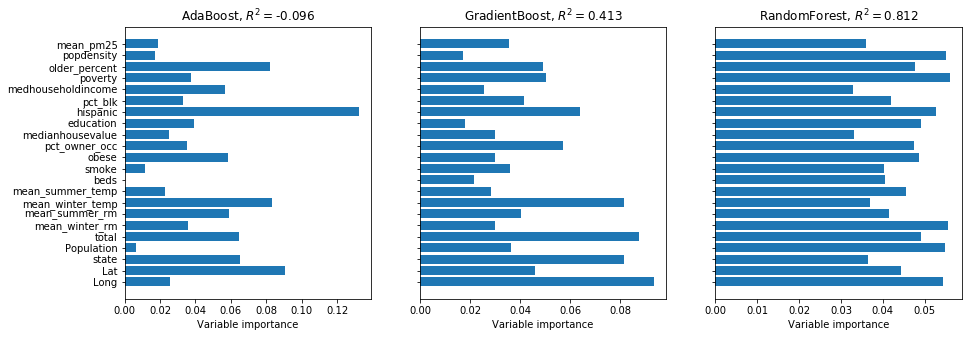

In [13]:
# Create variable importance plot for death rate
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)

models = ['AdaBoost', 'GradientBoost', 'RandomForest']
model_cols = ['ab_death_rate', 'gb_death_rate', 'rf_death_rate']
r2_scores = [ab_regr_death_rate.score(X, y), gb_regr_death_rate.score(X, y), rf_regr_death_rate.score(X, y)]

axs[0].invert_yaxis()  # labels read top-to-bottom

for i in range(3):
    y_pos = np.arange(len(feature_impts.feature))
    axs[i].barh(y_pos, feature_impts[model_cols[i]])
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(feature_impts.feature)
    axs[i].set_xlabel('Variable importance')
    axs[i].set_title(models[i] + ', $R^2 = $%.3f' % r2_scores[i])

A kind of interesting conclusion is that better performing models place more variable importance on mean $PM_{2.5}$?

### Repeating analysis but using PM2.5 as outcome

In [14]:
# Separate X into y_pm and X_pm
X_pm = X.drop(['mean_pm25'], axis=1)
y_pm = X['mean_pm25']

In [15]:
# Create AdaBoost model and report score
# Instantiate, fit, report score
ab_regr_pm = AdaBoostRegressor(n_estimators=600)
ab_regr_pm.fit(X_pm, y_pm)
ab_pm_score = ab_regr_pm.score(X_pm, y_pm)
ab_pm_score

0.8248238248281783

In [16]:
# Create GradientBoost model and report score
# Instantiate, fit, report score
gb_regr_pm = GradientBoostingRegressor()
gb_regr_pm.fit(X_pm, y_pm)
gb_pm_score = gb_regr_pm.score(X_pm, y_pm)
gb_pm_score

0.9509012647490697

In [17]:
# Create RandomForest model and report score
# Instantiate, fit, report score
rf_regr_pm = RandomForestRegressor()
rf_regr_pm.fit(X_pm, y_pm)
rf_pm_score = rf_regr_pm.score(X_pm, y_pm)
rf_pm_score

/Users/Josh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9841763367159341

In [18]:
# Add feature importances to feature_impts_pm
feature_impts_pm = pd.DataFrame()
feature_impts_pm['feature'] = X_pm.columns
feature_impts_pm['ab_pm'] = ab_regr_pm.feature_importances_
feature_impts_pm['gb_pm'] = gb_regr_pm.feature_importances_
feature_impts_pm['rf_pm'] = rf_regr_pm.feature_importances_

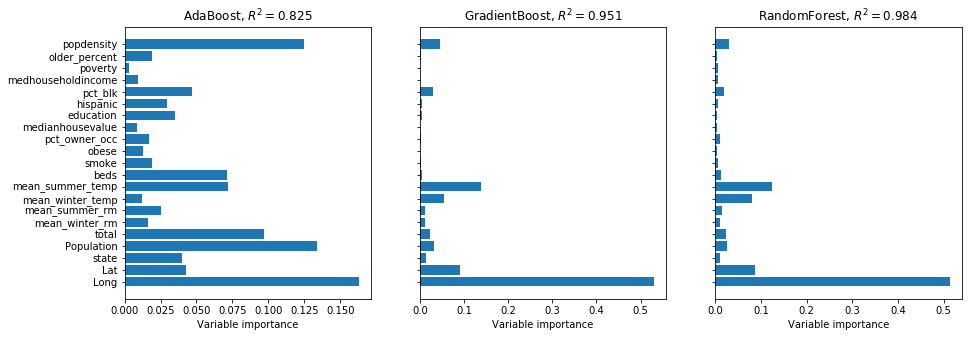

In [19]:
# Plot variable importance plots
fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
model_cols2 = ['ab_pm', 'gb_pm', 'rf_pm']
r2_scores_pm = [ab_pm_score, gb_pm_score, rf_pm_score]

axs[0].invert_yaxis()  # labels read top-to-bottom

for i in range(3):
    y_pos = np.arange(len(feature_impts_pm.feature))
    axs[i].barh(y_pos, feature_impts_pm[model_cols2[i]])
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(feature_impts_pm.feature)
    axs[i].set_xlabel('Variable importance')
    axs[i].set_title(models[i] + ', $R^2 = $%.3f' % r2_scores_pm[i])

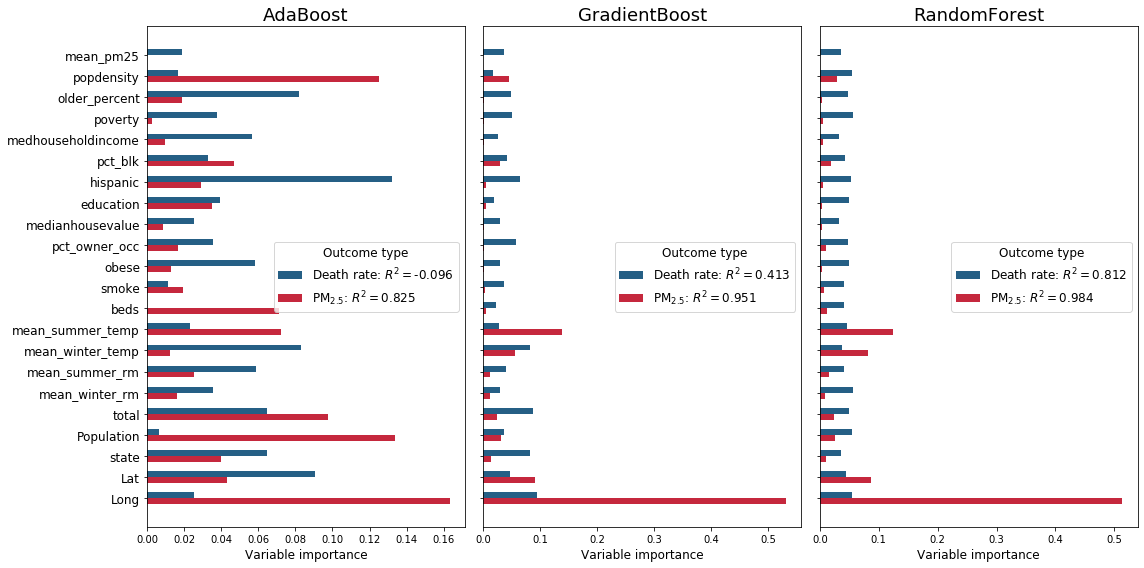

In [20]:
# Superimpose plots and save figure
# Create variable importance plot for death rate
fig, axs = plt.subplots(1,3, figsize=(16,8), sharey='row')
width = 0.28

axs[0].invert_yaxis()

for i in range(3):
    # Death rate as outcome
    y_pos = np.arange(len(feature_impts.feature))
    axs[i].barh(y_pos-width/2, feature_impts[model_cols[i]], width, 
                label=('Death rate: $R^2 = $%.3f' % r2_scores[i]), color=colors[0])
    
    # PM2.5 as outcome
    added_pm = np.insert(feature_impts_pm[model_cols2[i]].values, 0, 0, axis=0) # add zero entry for pm2.5
    axs[i].barh(y_pos+width/2, added_pm, width, label=('PM$_{2.5}$: $R^2 = $%.3f' % r2_scores_pm[i]),
               color=colors[1])
    
    # Aesthetics
    #axs[i].set_xscale('log')
    axs[i].set_yticks(y_pos)
    axs[i].set_yticklabels(feature_impts.feature, fontsize=12)
    axs[i].set_xlabel('Variable importance', fontsize=12)
    axs[i].set_title(models[i], fontsize=18)
    axs[i].legend(loc=7, title='Outcome type', fontsize=12, title_fontsize=12)
    
plt.tight_layout()
plt.savefig('ML_confounding_vars.png', dpi=800)

### Create a Decision Tree to examine variable importance

In [21]:
# Instantiate, fit, report score
dt_regr_death_rate = DecisionTreeRegressor()
dt_regr_death_rate.fit(X, y)
dt_regr_death_rate.score(X, y)

0.9999987151897426

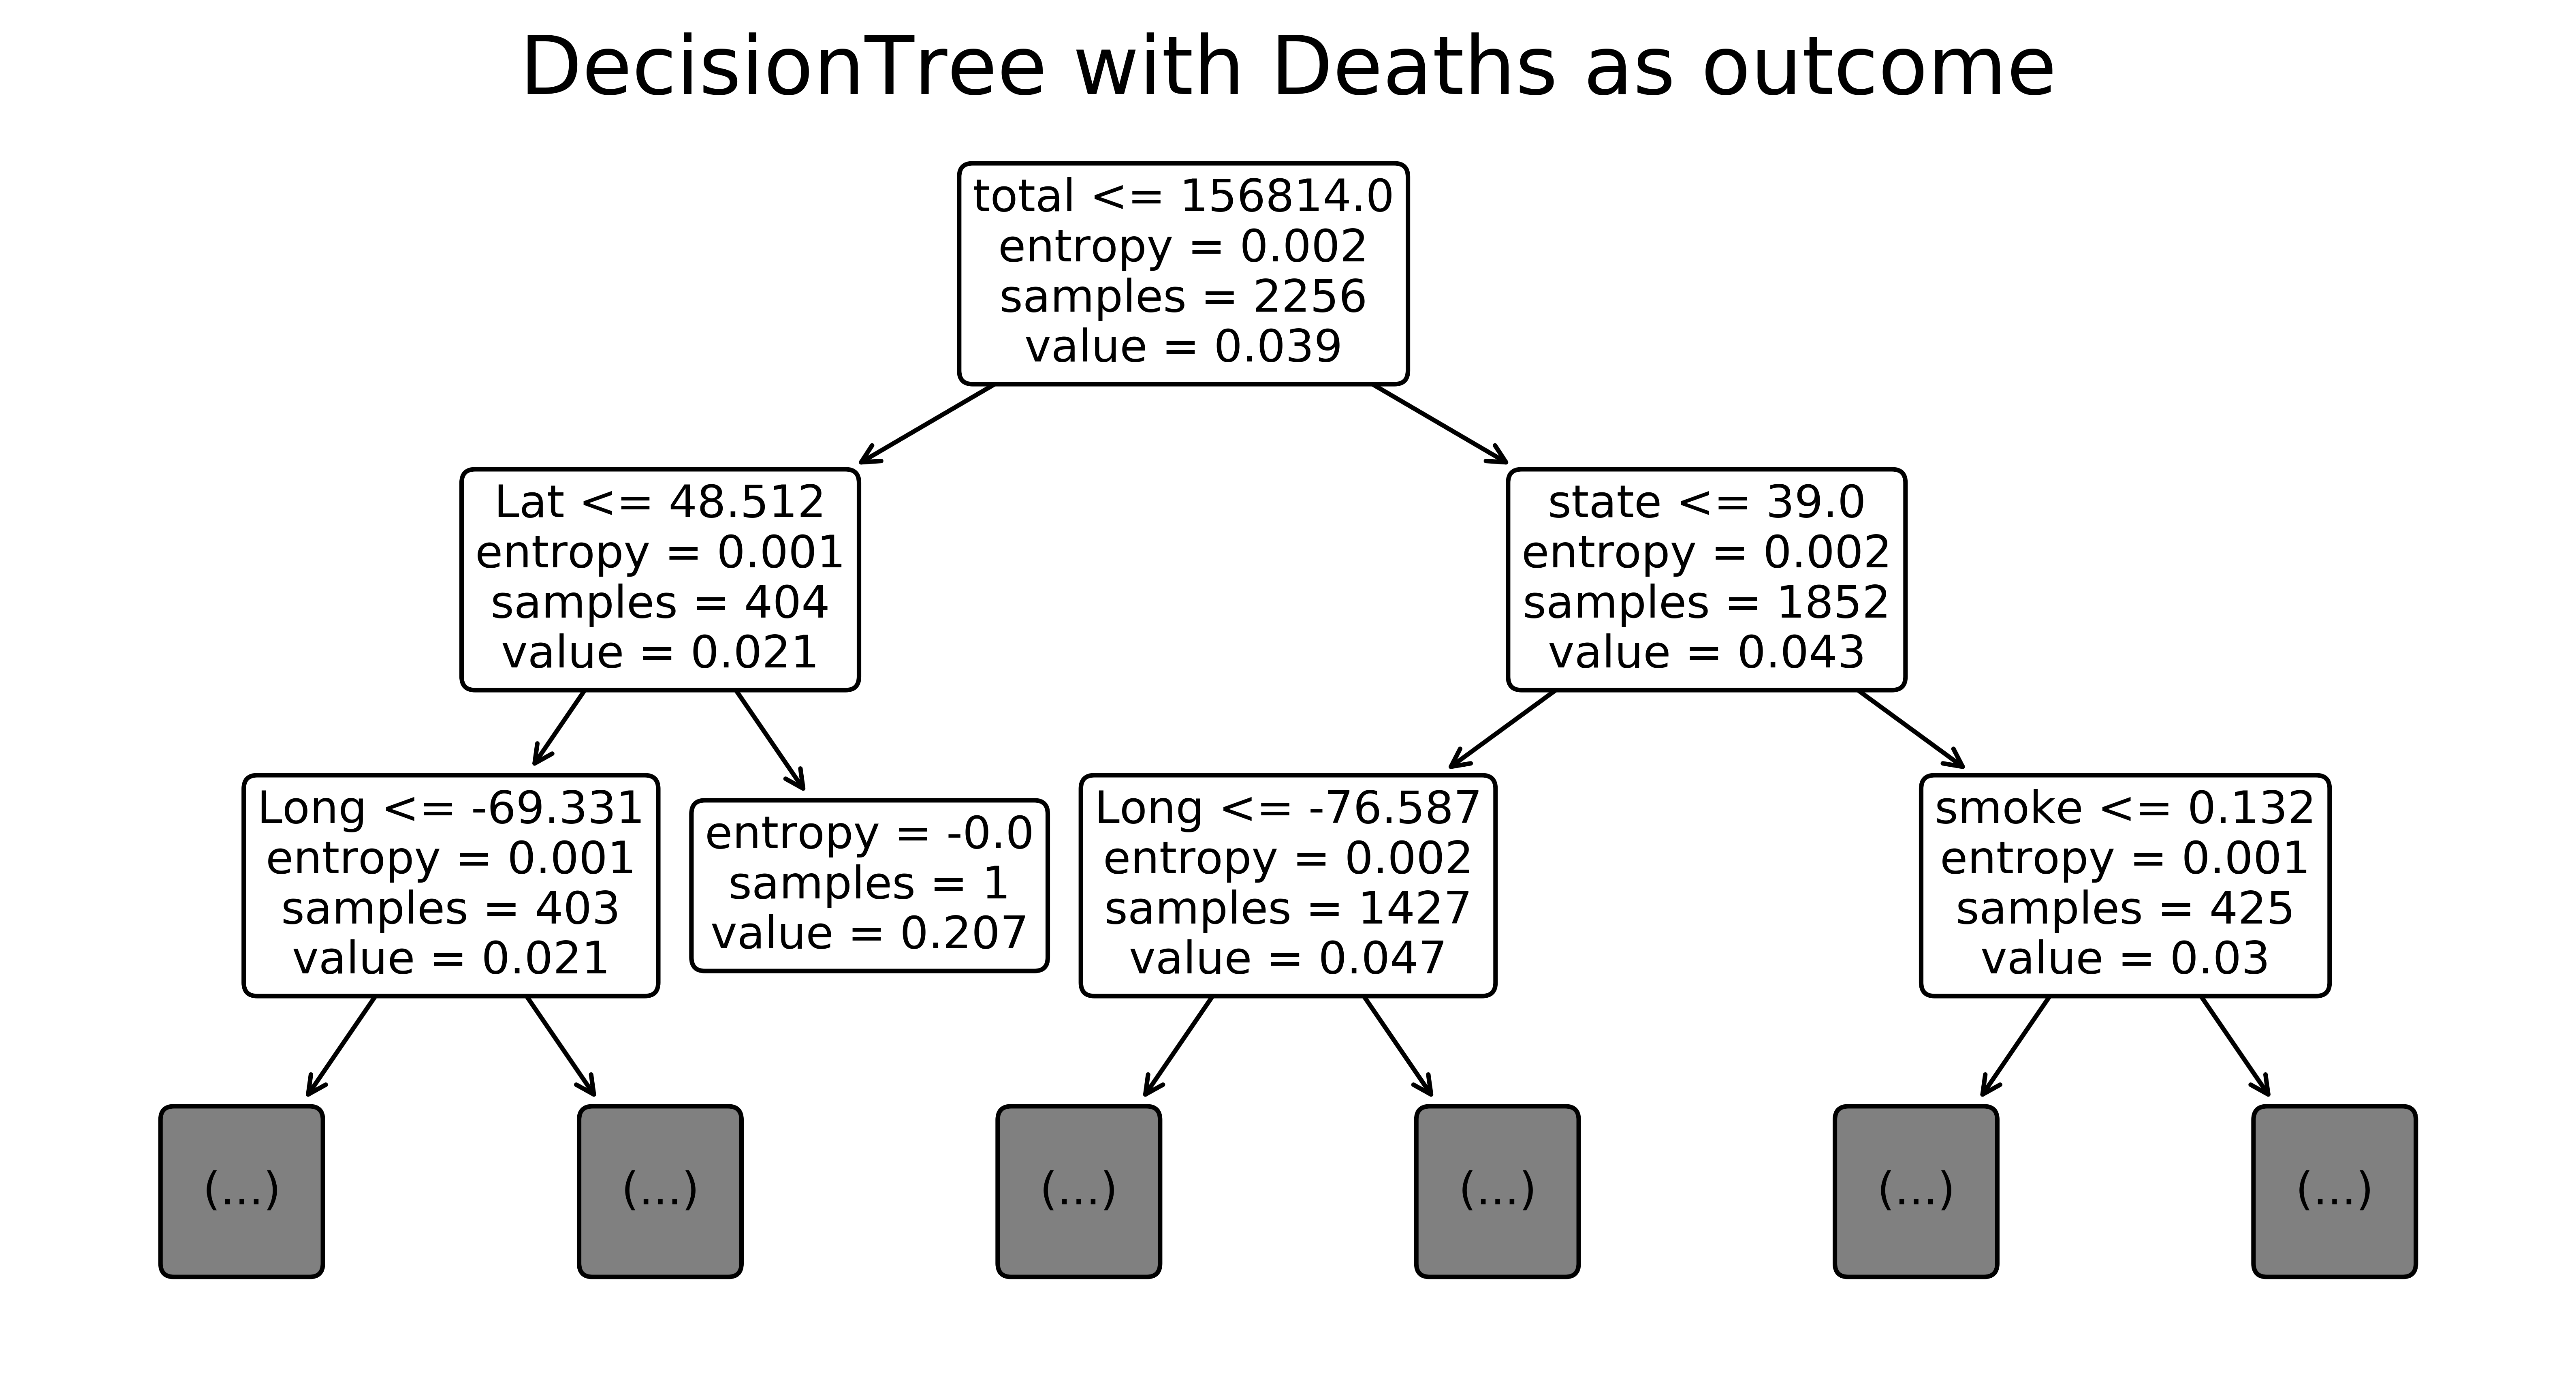

In [22]:
# Plot results
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=800)
plot_tree(dt_regr_death_rate, max_depth=2, feature_names = X.columns, fontsize=10, rounded=True, ax=ax)
#plt.tight_layout()
ax.set_title('DecisionTree with Deaths as outcome', fontsize=18)
plt.savefig('decision_tree_regressor.png', bbox_inches='tight', pad_inches=0)